### DCS 540
# Week 5-6, Week 7-8, Week 9-10, Week 11-12
## Project Milestone 2, Milestone 3, Milestone 4, Milestone 5

 Perform at least 5 data transformation and/or cleansing steps to your flat file data. 

### Name: Aniruddha Joshi
### Date: Nov 18, 2023

<a id="0"></a> <br>
 # Table of Contents
* [Milestone_2](#Milestone_2)
* [Milestone_3](#Milestone_3)
* [Milestone_4](#Milestone_4)
* [Milestone_5](#Milestone_5)

# Milestone 2 <a class="anchor" id="Milestone_2"></a>

In [2]:
#Defining Libraries required for import
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import sqlite3
import seaborn as sns
import requests
import urllib.request, urllib.parse, urllib.error
import ssl
import re
import json
#Display the plots inline
#%matplotlib inline

In [3]:
# Load the dataset 1
deliveries_df = pd.read_csv('deliveries.csv')

In [4]:
# Load the dataset 2
matches_df = pd.read_csv('matches.csv')

In [5]:
# Load the dataset 3
cricket_data_df = pd.read_csv('Cricket-Data.csv')

C:\Users\joshi\AppData\Local\Temp\ipykernel_24088\3835400717.py:2: DtypeWarning: Columns (101,107,108,140,141,145,146,147,153,154,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  cricket_data_df = pd.read_csv('Cricket-Data.csv')


In [6]:
cricket_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90308 entries, 0 to 90307
Columns: 177 entries, Unnamed: 0 to BOWLING_T20s_10
dtypes: float64(132), int64(2), object(43)
memory usage: 122.0+ MB


#### get basic information on datasets

In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [8]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

#### Perform some initial stat on the database  


In [9]:
deliveries_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
match_id,150460.0,318.281317,182.955531,1.0,161.0,319.0,476.0,636.0
inning,150460.0,1.482188,0.501768,1.0,1.0,1.0,2.0,4.0
over,150460.0,10.142649,5.674338,1.0,5.0,10.0,15.0,20.0
ball,150460.0,3.616483,1.807698,1.0,2.0,4.0,5.0,9.0
is_super_over,150460.0,0.000538,0.023196,0.0,0.0,0.0,0.0,1.0
wide_runs,150460.0,0.037498,0.257398,0.0,0.0,0.0,0.0,5.0
bye_runs,150460.0,0.004885,0.114234,0.0,0.0,0.0,0.0,4.0
legbye_runs,150460.0,0.022232,0.200104,0.0,0.0,0.0,0.0,5.0
noball_runs,150460.0,0.004340,0.072652,0.0,0.0,0.0,0.0,5.0
penalty_runs,150460.0,0.000066,0.018229,0.0,0.0,0.0,0.0,5.0


In [10]:
matches_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,636.0,318.500000,183.741666,1.0,159.75,318.5,477.25,636.0
season,636.0,2012.490566,2.773026,2008.0,2010.00,2012.0,2015.00,2017.0
dl_applied,636.0,0.025157,0.156726,0.0,0.00,0.0,0.00,1.0
win_by_runs,636.0,13.682390,23.908877,0.0,0.00,0.0,20.00,146.0
win_by_wickets,636.0,3.372642,3.420338,0.0,0.00,4.0,7.00,10.0
umpire3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Changing the headers

In [11]:
matches_df = matches_df.rename(columns={'win_by_runs': 'RunsWin', 'umpire3': 'Not Used'})
matches_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,626,627,628,629,630,631,632,633,634,635
id,1,2,3,4,5,6,7,8,9,10,...,627,628,629,630,631,632,633,634,635,636
season,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
city,Hyderabad,Pune,Rajkot,Indore,Bangalore,Hyderabad,Mumbai,Indore,Pune,Mumbai,...,Kanpur,Raipur,Visakhapatnam,Kanpur,Kolkata,Raipur,Bangalore,Delhi,Delhi,Bangalore
date,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-08,2017-04-09,2017-04-09,2017-04-10,2017-04-11,2017-04-12,...,2016-05-19,2016-05-20,2016-05-21,2016-05-21,2016-05-22,2016-05-22,2016-05-24,2016-05-25,2016-05-27,2016-05-29
team1,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Gujarat Lions,Kolkata Knight Riders,Royal Challengers Bangalore,Delhi Daredevils,Sunrisers Hyderabad,...,Kolkata Knight Riders,Sunrisers Hyderabad,Kings XI Punjab,Mumbai Indians,Kolkata Knight Riders,Delhi Daredevils,Gujarat Lions,Sunrisers Hyderabad,Gujarat Lions,Sunrisers Hyderabad
team2,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Sunrisers Hyderabad,Mumbai Indians,Kings XI Punjab,Rising Pune Supergiant,Mumbai Indians,...,Gujarat Lions,Delhi Daredevils,Rising Pune Supergiants,Gujarat Lions,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Sunrisers Hyderabad,Royal Challengers Bangalore
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore,Sunrisers Hyderabad,Mumbai Indians,Royal Challengers Bangalore,Rising Pune Supergiant,Mumbai Indians,...,Gujarat Lions,Delhi Daredevils,Kings XI Punjab,Gujarat Lions,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad
toss_decision,field,field,field,field,bat,field,field,bat,field,field,...,field,field,bat,field,field,field,field,field,field,bat
result,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal
dl_applied,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Reverting back the column names
matches_df = matches_df.rename(columns={'RunsWin':'win_by_runs', 'Not Used' :'umpire3'})


#### Identify outliers and bad data

In [13]:
# Identifying the bad data
print(deliveries_df.isna().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64


In [14]:
# Identifying the bad data
print(matches_df.isna().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64


In [15]:
#Printing the data having null records
matches_df[matches_df.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [16]:
matches_df = matches_df

matches_df = matches_df.dropna(subset=['player_of_match'])

### Create a histogram for each numerical column

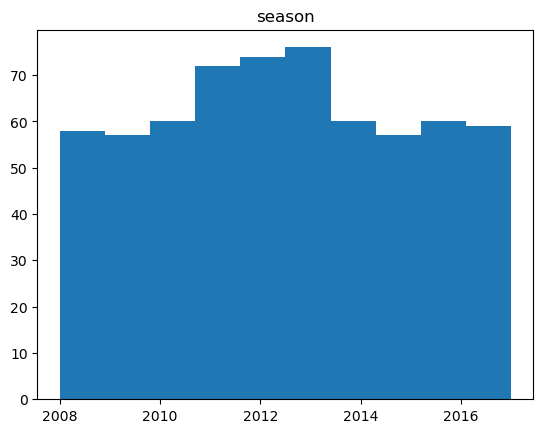

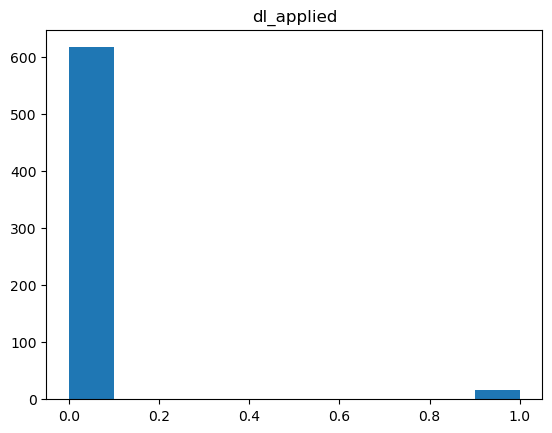

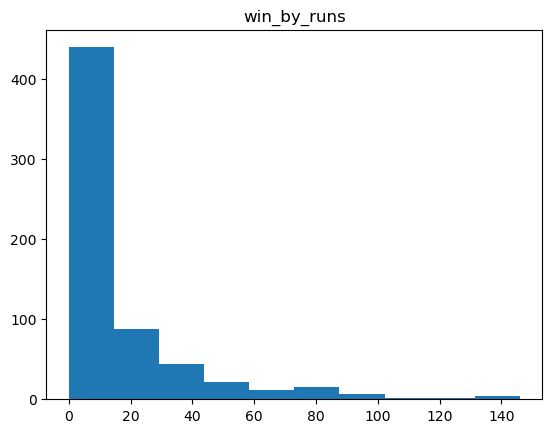

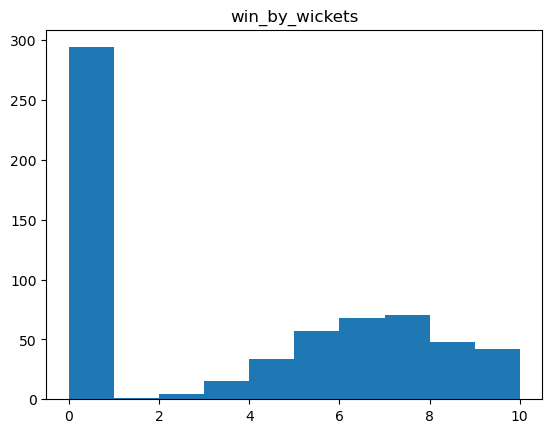

In [17]:
# Create a histogram for each numerical column
# Create a histogram for each numerical column


matches_df_Mod_df = matches_df.drop('umpire3', axis=1)
matches_df_Mod_df = matches_df_Mod_df.drop('id', axis=1)

for col in matches_df_Mod_df.select_dtypes('number'):
    plt.hist(matches_df_Mod_df[col])
    plt.title(col)
    plt.show()

#### Create a correlation matrix to see the relationships between the variables

In [19]:
# Create a correlation matrix to see the relationships between the variables
corr_matrix = matches_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'Hyderabad'

#### Create a boxplot for each numerical column to see the distribution of the data

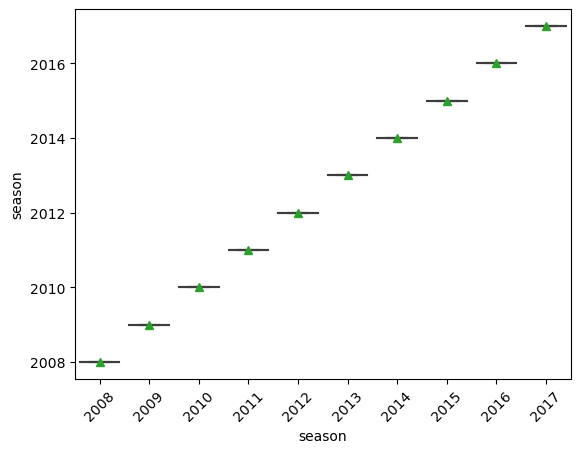

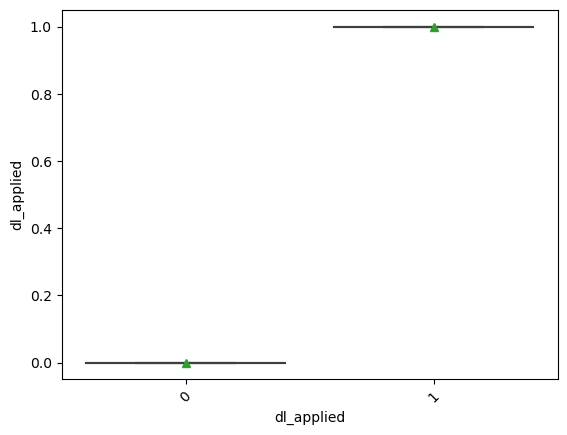

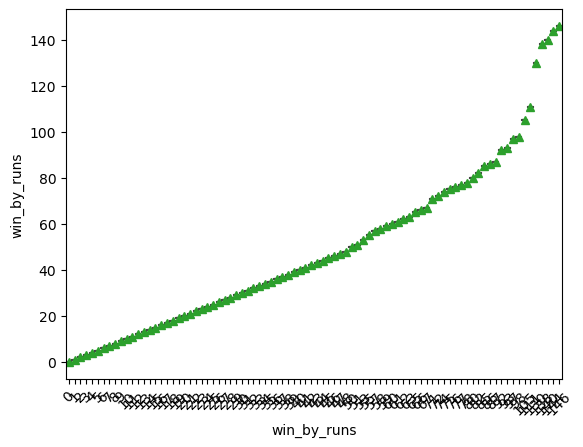

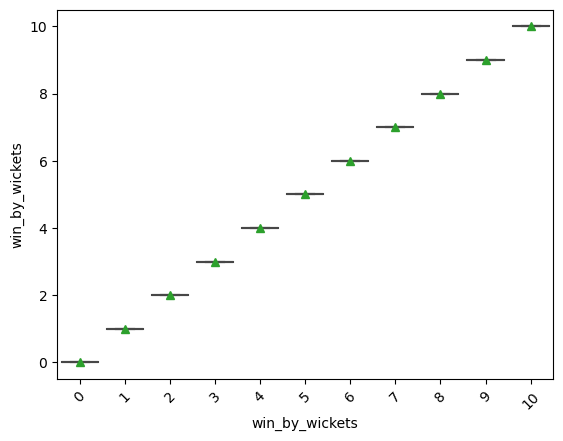

In [20]:
# Create a boxplot for each numerical column to see the distribution of the data
for col in matches_df_Mod_df.select_dtypes('number'):
    sns.boxplot(x=col, y=col, showmeans=True, data=matches_df_Mod_df)
    # Rotate x labels to prevent overlapping
    plt.xticks(rotation=45)
    plt.show()

#### Find duplicates

In [21]:
# Find duplicates in the DataFrame
duplicates = deliveries_df[deliveries_df.duplicated()]

# Print the duplicate rows
(duplicates)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [22]:
# refer to the row number 52178 is duplicated in data set deliveries_df
# Hence dropping the duplicate row
# Remove duplicates from the DataFrame
before_size = deliveries_df.size
deliveries_df = deliveries_df.drop_duplicates()
after_size = deliveries_df.size
print(f"The beore size is {before_size} and the after size is {after_size}")

The beore size is 3159660 and the after size is 3159639


In [23]:
# Find duplicates in the DataFrame
duplicates = matches_df[matches_df.duplicated()]

# Print the duplicate rows
(duplicates)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [24]:
print("There are no duplicates rows in matches_df.")

There are no duplicates rows in matches_df.


### Fuzzy Matching of Strings

In [25]:
#Finding any mismatches
from Levenshtein import distance
Player_Names=matches_df.player_of_match

name_of_player = "DA Warner"
for index, name in enumerate(Player_Names):
    # Check if the object has a length
    #if hasattr(name_of_player, 'len'):
        # The object has a length
        #length = len(obj)
        #print(f"{name}")
        if distance(name_of_player, name) < 3:
            print(f"{name} {name_of_player} {distance(name_of_player, name)}")

DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0
DA Warner DA Warner 0


In [26]:
#Finding any mismatches
from Levenshtein import distance
Player_Names=matches_df.player_of_match
master_List_Player_name= deliveries_df.batsman
list_of_player=[]
name_of_player = "DA Warner"
for index, name in enumerate(Player_Names):
    name_of_player = name
    for index, name1 in enumerate(master_List_Player_name):
        if distance(name_of_player, name1) < 3 & distance(name_of_player, name1) > 0:
            print(f"{name1} {name_of_player} {distance(name_of_player, name1)}")
            list_of_player.append(distance(name_of_player, name1) )

# Milestone 3 <a class="anchor" id="Milestone_3"></a>

#### Funtion to read the website page

In [27]:

def ReadWebsite(url ):
    # URL of the website with the HTML table
    #url = "https://www.espncricinfo.com/records/team/team-highest-match-aggregates/australia-2/twenty20-internationals-3"

    # Send an HTTP GET request to the URL
    response = requests.get(url)
    return response

#### Function to create a dataframe

In [28]:
def CreateDataframe(response, tableIndex=0):
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.text, "html.parser")
    
        # Find the HTML table element you want to convert to a DataFrame
        table = soup.find_all("table")       
       
        df = pd.read_html(str(table))[tableIndex]  # Assumes the first table on the page
        return df
    else:
        return None

In [29]:
#Read website page result summary
response = ReadWebsite("https://www.espncricinfo.com/records/results-summary-283307")
results_sum_df = CreateDataframe(response)
results_sum_df.head()

,Team,Span,Mat,Won,Lost,Draw,Tied,Tie+W,Tie+L,NR,W/L,%W,%L,%D,%
0,Afghanistan,2010-2023,118,74,42,0,0,0,1,1,1.761,62.71,35.59,0.0,63.67
1,Argentina,2019-2023,19,10,9,0,0,0,0,0,1.111,52.63,47.36,0.0,52.63
2,Australia,2005-2023,177,94,76,0,0,1,2,4,1.236,53.10,42.93,0.0,55.2
3,Austria,2019-2023,39,20,17,0,0,0,0,2,1.176,51.28,43.58,0.0,54.05
4,Bahamas,2021-2023,15,3,12,0,0,0,0,0,0.250,20.00,80.00,0.0,20


In [30]:
#Read website page for match results
response = ReadWebsite("https://www.espncricinfo.com/records/year/team-match-results/2023-2023/twenty20-internationals-3")
Match_results_df = CreateDataframe(response)
Match_results_df.head()



,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,India,Sri Lanka,India,2 runs,Wankhede,"Jan 3, 2023",T20I # 1984
1,India,Sri Lanka,Sri Lanka,16 runs,Pune,"Jan 5, 2023",T20I # 1985
2,India,Sri Lanka,India,91 runs,Rajkot,"Jan 7, 2023",T20I # 1986
3,Zimbabwe,Ireland,Zimbabwe,5 wickets,Harare,"Jan 12, 2023",T20I # 1987
4,Zimbabwe,Ireland,Ireland,6 wickets,Harare,"Jan 14, 2023",T20I # 1988


In [31]:
#Read website page for match results
response = ReadWebsite("https://www.espncricinfo.com/records/most-matches-as-captain-283747")
Captian_df = CreateDataframe(response)
Captian_df.head()



,Player,Span,Mat,Won,Lost,Tied,Draw,NR,W/L,%W,%L,% Tied,% Draw,%NR,%
0,RT Ponting (AUS/ICC),2002-2012,230,165,51,2,0,12,3.23,71.73,22.17,0.86,0.0,5.21,76.14
1,SP Fleming (NZ),1997-2007,218,98,106,1,0,13,0.92,44.95,48.62,0.45,0.0,5.96,48.04
2,MS Dhoni (IND),2007-2018,200,110,74,5,0,11,1.48,55.00,37.00,2.50,0.0,5.50,59.52
3,A Ranatunga (SL),1988-1999,193,89,95,1,0,8,0.93,46.11,49.22,0.51,0.0,4.14,48.37
4,AR Border (AUS),1985-1994,178,107,67,1,0,3,1.59,60.11,37.64,0.56,0.0,1.68,61.42


#### Replace Headers

In [32]:
#Replace headers of results_sum_d
test_df= results_sum_df
print(f"Before modifying the columns names: {test_df.columns}")

test_df.columns ={'Team', 'Span', 'Mat', 'Won', 'Lost', 'Draw', 'Tied', 'Tie and Win', 'Tie and Lost',
       'NR', 'W/L', 'PCT W', 'PCT L', '%D', '%'}

print(f"After modifying the columns names: {test_df.columns}")

Before modifying the columns names: Index(['Team', 'Span', 'Mat', 'Won', 'Lost', 'Draw', 'Tied', 'Tie+W', 'Tie+L',
       'NR', 'W/L', '%W', '%L', '%D', '%'],
      dtype='object')
After modifying the columns names: Index(['Lost', 'Won', 'Mat', 'Team', '%', '%D', 'PCT L', 'Span', 'Tied',
       'Draw', 'NR', 'Tie and Win', 'Tie and Lost', 'PCT W', 'W/L'],
      dtype='object')


#### Splitting the one Column data into multiple columns + Formating data into a more readable format

In [33]:
# Check head
Match_results_df.head()


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,India,Sri Lanka,India,2 runs,Wankhede,"Jan 3, 2023",T20I # 1984
1,India,Sri Lanka,Sri Lanka,16 runs,Pune,"Jan 5, 2023",T20I # 1985
2,India,Sri Lanka,India,91 runs,Rajkot,"Jan 7, 2023",T20I # 1986
3,Zimbabwe,Ireland,Zimbabwe,5 wickets,Harare,"Jan 12, 2023",T20I # 1987
4,Zimbabwe,Ireland,Ireland,6 wickets,Harare,"Jan 14, 2023",T20I # 1988


In [34]:
#Split the Margin data in to runs

Match_results_df['Win-Runs'] = Match_results_df['Margin'].apply(lambda x: int(x.split(' ')[0]) if x.find('runs') > -1 else np.nan) 

In [35]:
#Split the Margin data in to wickets

Match_results_df['Win-Wickets'] = Match_results_df['Margin'].apply(lambda x: int(x.split(' ')[0]) if x.find('wickets') > -1 else np.nan) 

In [36]:
#Check the modified database - refer the two additonal columns based on Margin column
Match_results_df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Win-Runs,Win-Wickets
0,India,Sri Lanka,India,2 runs,Wankhede,"Jan 3, 2023",T20I # 1984,2.0,NaN
1,India,Sri Lanka,Sri Lanka,16 runs,Pune,"Jan 5, 2023",T20I # 1985,16.0,NaN
2,India,Sri Lanka,India,91 runs,Rajkot,"Jan 7, 2023",T20I # 1986,91.0,NaN
3,Zimbabwe,Ireland,Zimbabwe,5 wickets,Harare,"Jan 12, 2023",T20I # 1987,NaN,5.0
4,Zimbabwe,Ireland,Ireland,6 wickets,Harare,"Jan 14, 2023",T20I # 1988,NaN,6.0


#### Identify outliers and bad data

In [37]:
#identifying the outliers on Match_results_df dataset
Match_results_df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Win-Runs,Win-Wickets
0,India,Sri Lanka,India,2 runs,Wankhede,"Jan 3, 2023",T20I # 1984,2.0,NaN
1,India,Sri Lanka,Sri Lanka,16 runs,Pune,"Jan 5, 2023",T20I # 1985,16.0,NaN
2,India,Sri Lanka,India,91 runs,Rajkot,"Jan 7, 2023",T20I # 1986,91.0,NaN
3,Zimbabwe,Ireland,Zimbabwe,5 wickets,Harare,"Jan 12, 2023",T20I # 1987,NaN,5.0
4,Zimbabwe,Ireland,Ireland,6 wickets,Harare,"Jan 14, 2023",T20I # 1988,NaN,6.0


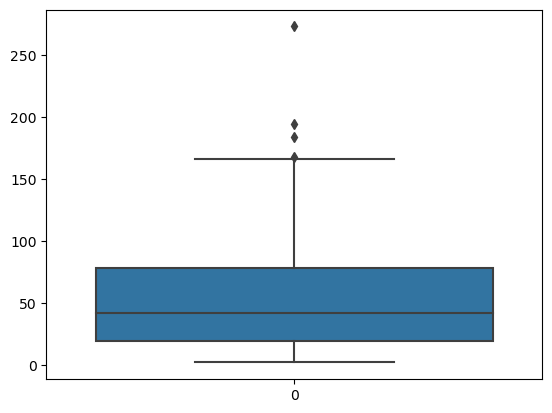

In [38]:
sns.boxplot(data=Match_results_df['Win-Runs'])
 # Show the plot.
plt.show()

In [39]:
#We can clearly see the outliers are above 160 runs
#Removing outliers above 160 runs
Match_results_df['Win-Runs']=Match_results_df['Win-Runs'].apply(lambda x: x if x < 160 else np.nan)

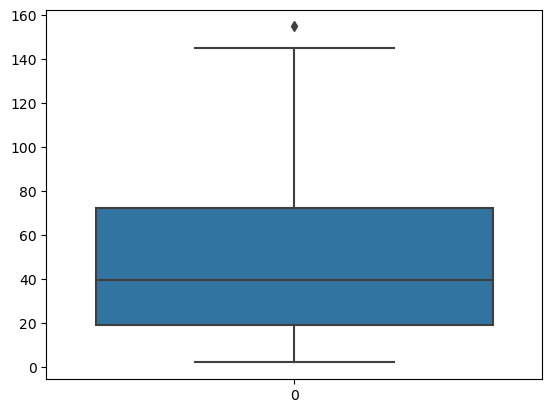

In [40]:
#Data After correction by removing outliers
sns.boxplot(data=Match_results_df['Win-Runs'])
 # Show the plot.
plt.show()

#### Find duplicates

In [41]:
#In general find if there are any duplicate records

print(f"There are {Match_results_df.duplicated().sum()} duplicate records in the Match_results_df.")
print(f"There are {results_sum_df.duplicated().sum()} duplicate records in the results_sum_df.")
print(f"There are {Captian_df.duplicated().sum()} duplicate records in the Captian_df.")

There are 0 duplicate records in the Match_results_df.
There are 0 duplicate records in the results_sum_df.
There are 0 duplicate records in the Captian_df.


In [42]:
#Finding duplicates in the data sets

print(f"There are {Match_results_df['Winner'].duplicated().sum()} duplicate values in Winner columns of Match_results_df.\n\n")
print(f"The unique values are :\n {Match_results_df['Winner'].unique()}")

There are 288 duplicate values in Winner columns of Match_results_df.


The unique values are :
 ['India' 'Sri Lanka' 'Zimbabwe' 'Ireland' 'New Zealand' 'Afghanistan'
 'U.A.E.' 'Bermuda' 'Spain' 'no result' 'Panama' 'Bahamas' 'Cayman Is'
 'Argentina' 'Malaysia' 'Hong Kong' 'Bangladesh' 'Bahrain' 'Kuwait'
 'Vanuatu' 'Fiji' 'West Indies' 'South Africa' 'Pakistan' 'tied'
 'Portugal' 'Indonesia' 'Singapore' 'Cambodia' 'Gibraltar' 'Malta'
 'Denmark' 'Norway' 'Sweden' 'Finland' 'Malawi' 'Botswana' 'Mozambique'
 'Kenya' 'Uganda' 'Germany' 'Czech Rep.' 'Rwanda' 'Serbia' 'Bulgaria'
 'Turkey' 'Luxembourg' 'Switzerland' 'Jersey' 'Isle of Man' 'France'
 'Romania' 'Scotland' 'Japan' 'P.N.G.' 'Italy' 'Philippines' 'Bhutan'
 'Thailand' 'China' 'Hungary' 'Guernsey' 'Tanzania' 'Australia' 'England'
 'Qatar' 'Oman' 'Nepal' 'Maldives' 'Saudi Arabia' 'Estonia' 'Canada'
 'Nigeria' 'Ghana' 'Sierra Leone' 'Mexico' 'Namibia']


#### Combining two dataframes

In [43]:
# Combining results_sum_df and Match_results_df
results_sum_df.head()

,Lost,Won,Mat,Team,%,%D,PCT L,Span,Tied,Draw,NR,Tie and Win,Tie and Lost,PCT W,W/L
0,Afghanistan,2010-2023,118,74,42,0,0,0,1,1,1.761,62.71,35.59,0.0,63.67
1,Argentina,2019-2023,19,10,9,0,0,0,0,0,1.111,52.63,47.36,0.0,52.63
2,Australia,2005-2023,177,94,76,0,0,1,2,4,1.236,53.10,42.93,0.0,55.2
3,Austria,2019-2023,39,20,17,0,0,0,0,2,1.176,51.28,43.58,0.0,54.05
4,Bahamas,2021-2023,15,3,12,0,0,0,0,0,0.250,20.00,80.00,0.0,20


In [44]:
Match_results_df['Mat']=Match_results_df['Winner']
Match_results_df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Win-Runs,Win-Wickets,Mat
0,India,Sri Lanka,India,2 runs,Wankhede,"Jan 3, 2023",T20I # 1984,2.0,NaN,India
1,India,Sri Lanka,Sri Lanka,16 runs,Pune,"Jan 5, 2023",T20I # 1985,16.0,NaN,Sri Lanka
2,India,Sri Lanka,India,91 runs,Rajkot,"Jan 7, 2023",T20I # 1986,91.0,NaN,India
3,Zimbabwe,Ireland,Zimbabwe,5 wickets,Harare,"Jan 12, 2023",T20I # 1987,NaN,5.0,Zimbabwe
4,Zimbabwe,Ireland,Ireland,6 wickets,Harare,"Jan 14, 2023",T20I # 1988,NaN,6.0,Ireland


In [45]:
# combining two data sets based on Winner and Mat
#Combined_df=pd.merge(results_sum_df,Match_results_df,how='inner',on='Mat')
Combined_df = pd.concat([results_sum_df, Match_results_df], axis=0, ignore_index=True)
Combined_df.head()


,Lost,Won,Mat,Team,%,%D,PCT L,Span,Tied,Draw,...,W/L,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Win-Runs,Win-Wickets
0,Afghanistan,2010-2023,118,74.0,42.0,0.0,0.0,0.0,1.0,1.0,...,63.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2019-2023,19,10.0,9.0,0.0,0.0,0.0,0.0,0.0,...,52.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,2005-2023,177,94.0,76.0,0.0,0.0,1.0,2.0,4.0,...,55.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2019-2023,39,20.0,17.0,0.0,0.0,0.0,0.0,2.0,...,54.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahamas,2021-2023,15,3.0,12.0,0.0,0.0,0.0,0.0,0.0,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(f"The size of results_sum_df is {results_sum_df.shape}.")
print(f"The size of Match_results_df is {Match_results_df.shape}.")
print(f"The size of Combined_df is {Combined_df.shape}.")

The size of results_sum_df is (103, 15).
The size of Match_results_df is (365, 10).
The size of Combined_df is (468, 24).


### Ethical Implementation

The data represents the number of matches won by the countries and the player performance. I see below ethical impications
1. The number of matches won by the countries may encourage the advertisers to concentrate on winning teams only.
2. The underground betting market may use this information to bet on the specific teams and/or players only.
3. The losing team may lose the ethusiasum of the game and resumed they are going to lose the match.
4. Only specfic players may get a chance to play multiple matches or the selection will be based on the playesr who did best againt specific teams 


In [47]:
##

../Week7-8/JoshiAniruddhaDCS540Week7-8-Assignment1.ipynb

# Milestone 4 <a class="anchor" id="Milestone_4"></a>

### Reading the data from APIs

In [48]:
## Define the APi URL

api_url = "https://cricket.sportmonks.com/api/v2.0/players?api_token=PClqGEdYVpY0Pc1fzjwxrFHRDzCeVS4AHbXk4Ef90D4roFStme1lDWjdmKEO"

In [49]:
# Send a request
response = requests.get(api_url)

In [50]:
#If the response if good then print it
if response.status_code == 200:
    data = response.json()
    
    #use prety print function
    retty_json = json.dumps(data, indent=4)
    #print(retty_json)
else:
    print("Error:", response.status_code)

In [51]:
players_df=pd.json_normalize(data, record_path=['data'])
players_df.head()

,resource,id,country_id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,updated_at,position.resource,position.id,position.name
0,players,2,52126,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,1991-11-23,m,right-hand-bat,legbreak,2020-03-31T05:00:31.000000Z,positions,1,Batsman
1,players,3,52126,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,1987-11-25,m,right-hand-bat,right-arm-fast-medium,2020-12-14T18:58:56.000000Z,positions,2,Bowler
2,players,4,52126,Sarfraz,Ahmed,Sarfraz Ahmed,https://cdn.sportmonks.com/images/cricket/play...,1987-05-22,m,right-hand-bat,right-arm-offbreak,2020-04-07T08:51:02.000000Z,positions,3,Wicketkeeper
3,players,5,52126,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,1985-02-19,m,right-hand-bat,legbreak,2020-04-01T02:28:23.000000Z,positions,1,Batsman
4,players,6,52126,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,1990-04-10,m,left-hand-bat,slow-left-arm-orthodox,2020-04-02T02:22:22.000000Z,positions,1,Batsman


In [52]:
#Now get the league information
api_url = "https://cricket.sportmonks.com/api/v2.0/leagues?api_token=PClqGEdYVpY0Pc1fzjwxrFHRDzCeVS4AHbXk4Ef90D4roFStme1lDWjdmKEO"
response = requests.get(api_url)
#If the response if good then print it
if response.status_code == 200:
    data = response.json()
    
    #use prety print function
    retty_json = json.dumps(data, indent=4)
    #print(retty_json)
else:
    print("Error:", response.status_code)

In [53]:
leagues_df=pd.json_normalize(data, record_path=['data'])
leagues_df.head()

,resource,id,season_id,country_id,name,code,image_path,type,updated_at
0,leagues,3,1427,99474,Twenty20 International,T20I,https://cdn.sportmonks.com/images/cricket/leag...,phase,2023-10-03T13:31:56.000000Z
1,leagues,5,1349,98,Big Bash League,BBL,https://cdn.sportmonks.com/images/cricket/leag...,league,2023-07-07T21:33:29.000000Z
2,leagues,10,1145,146,CSA T20 Challenge,T20C,https://cdn.sportmonks.com/images/cricket/leag...,league,2022-09-18T15:09:59.000000Z


In [54]:

#Now get the fixtures information
api_url = "https://cricket.sportmonks.com/api/v2.0/fixtures?includes=runs&api_token=PClqGEdYVpY0Pc1fzjwxrFHRDzCeVS4AHbXk4Ef90D4roFStme1lDWjdmKEO"
#headers ={'include':'runs'}
response = requests.get(api_url)#, headers=headers)
#If the response if good then print it
if response.status_code == 200:
    data = response.json()
    
    #use prety print function
    retty_json = json.dumps(data, indent=4)
    #print(retty_json)
else:
    print("Error:", response.status_code)

In [55]:
fixtures_df=pd.json_normalize(data, record_path=['data'])
fixtures_df.head()

,resource,id,league_id,season_id,stage_id,round,localteam_id,visitorteam_id,starting_at,type,...,weather_report,localteam_dl_data.score,localteam_dl_data.overs,localteam_dl_data.wickets_out,visitorteam_dl_data.score,visitorteam_dl_data.overs,visitorteam_dl_data.wickets_out,visitorteam_dl_data.total_overs_played,localteam_dl_data.rpc_overs,localteam_dl_data.rpc_targets
0,fixtures,3,3,6,1755,2nd T20I,40,41,2018-10-12T16:00:00.000000Z,T20I,...,[],None,None,None,None,None,None,NaN,NaN,NaN
1,fixtures,4,3,6,1755,3rd T20I,40,41,2018-10-14T12:30:00.000000Z,T20I,...,[],None,None,None,None,None,None,NaN,NaN,NaN
2,fixtures,216,3,6,24,1st T20I,10,43,2018-11-04T13:30:00.000000Z,T20I,...,[],None,None,None,None,None,None,NaN,NaN,NaN
3,fixtures,217,3,6,24,2nd T20I,10,43,2018-11-06T13:30:00.000000Z,T20I,...,[],None,None,None,None,None,None,NaN,NaN,NaN
4,fixtures,218,3,6,24,3rd T20I,10,43,2018-11-11T13:30:00.000000Z,T20I,...,[],None,None,None,None,None,None,NaN,NaN,NaN


In [56]:
#Now get the teams information
api_url = "https://cricket.sportmonks.com/api/v2.0/teams?api_token=PClqGEdYVpY0Pc1fzjwxrFHRDzCeVS4AHbXk4Ef90D4roFStme1lDWjdmKEO"
#headers ={'include':'runs'}
response = requests.get(api_url)#, headers=headers)
#If the response if good then print it
if response.status_code == 200:
    data = response.json()
    
    #use prety print function
    retty_json = json.dumps(data, indent=4)
    #print(retty_json)
else:
    print("Error:", response.status_code)

In [57]:
teams_df=pd.json_normalize(data, record_path=['data'])
#get the size of teams_df
teams_df.head()


,resource,id,name,code,image_path,country_id,national_team,updated_at
0,teams,1,Pakistan,PAK,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
1,teams,10,India,IND,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
2,teams,36,Australia,AUS,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
3,teams,37,Bangladesh,BGD,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2018-11-29T11:47:20.000000Z
4,teams,38,England,ENG,https://cdn.sportmonks.com/images/cricket/team...,190324,True,2019-01-29T11:07:04.000000Z


### Modifyig column names

In [58]:
#Replace headers of results_sum_d
test_df= players_df.copy()
print(f"Before modifying the columns names: {test_df.columns}")

test_df.columns ={'ResoureName', 'id', 'country_id', 'firstname', 'lastname', 'fullname',
       'image_path', 'dateofbirth', 'gender', 'battingstyle', 'BlowingStyle',
       'updated_at', 'ResourcePosition', 'position.id', 'PositionName'}


print(f"After modifying the columns names: {test_df.columns}")

Before modifying the columns names: Index(['resource', 'id', 'country_id', 'firstname', 'lastname', 'fullname',
       'image_path', 'dateofbirth', 'gender', 'battingstyle', 'bowlingstyle',
       'updated_at', 'position.resource', 'position.id', 'position.name'],
      dtype='object')
After modifying the columns names: Index(['position.id', 'gender', 'ResourcePosition', 'PositionName',
       'dateofbirth', 'firstname', 'BlowingStyle', 'id', 'fullname',
       'ResoureName', 'image_path', 'lastname', 'battingstyle', 'updated_at',
       'country_id'],
      dtype='object')


#### Splitting the rows/filtering data into multiple datasets

In [59]:
# Check head
players_df.head()

,resource,id,country_id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,updated_at,position.resource,position.id,position.name
0,players,2,52126,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,1991-11-23,m,right-hand-bat,legbreak,2020-03-31T05:00:31.000000Z,positions,1,Batsman
1,players,3,52126,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,1987-11-25,m,right-hand-bat,right-arm-fast-medium,2020-12-14T18:58:56.000000Z,positions,2,Bowler
2,players,4,52126,Sarfraz,Ahmed,Sarfraz Ahmed,https://cdn.sportmonks.com/images/cricket/play...,1987-05-22,m,right-hand-bat,right-arm-offbreak,2020-04-07T08:51:02.000000Z,positions,3,Wicketkeeper
3,players,5,52126,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,1985-02-19,m,right-hand-bat,legbreak,2020-04-01T02:28:23.000000Z,positions,1,Batsman
4,players,6,52126,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,1990-04-10,m,left-hand-bat,slow-left-arm-orthodox,2020-04-02T02:22:22.000000Z,positions,1,Batsman


In [60]:
#Splitting the data 
players_batsman = players_df[players_df['position.name']=='Batsman'].copy()
players_batsman.head()

,resource,id,country_id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,updated_at,position.resource,position.id,position.name
0,players,2,52126,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,1991-11-23,m,right-hand-bat,legbreak,2020-03-31T05:00:31.000000Z,positions,1,Batsman
3,players,5,52126,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,1985-02-19,m,right-hand-bat,legbreak,2020-04-01T02:28:23.000000Z,positions,1,Batsman
4,players,6,52126,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,1990-04-10,m,left-hand-bat,slow-left-arm-orthodox,2020-04-02T02:22:22.000000Z,positions,1,Batsman
5,players,7,52126,Imam,ul Haq,Imam ul Haq,https://cdn.sportmonks.com/images/cricket/play...,1995-12-12,m,left-hand-bat,None,2020-04-02T09:00:48.000000Z,positions,1,Batsman
6,players,8,52126,Babar,Azam,Babar Azam,https://cdn.sportmonks.com/images/cricket/play...,1994-10-15,m,right-hand-bat,right-arm-offbreak,2020-02-23T10:47:44.000000Z,positions,1,Batsman


In [61]:
#Splitting the data 
players_bolwers = players_df[players_df['position.name']=='Bowler']
players_bolwers.head()

,resource,id,country_id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,updated_at,position.resource,position.id,position.name
1,players,3,52126,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,1987-11-25,m,right-hand-bat,right-arm-fast-medium,2020-12-14T18:58:56.000000Z,positions,2,Bowler
10,players,12,52126,Yasir,Shah,Yasir Shah,https://cdn.sportmonks.com/images/cricket/play...,1986-05-02,m,right-hand-bat,legbreak-googly,2020-04-09T05:17:13.000000Z,positions,2,Bowler
13,players,15,52126,Mohammad,Abbas,Mohammad Abbas,https://cdn.sportmonks.com/images/cricket/play...,1990-03-10,m,right-hand-bat,right-arm-fast-medium,2020-04-05T06:16:39.000000Z,positions,2,Bowler
14,players,16,52126,Hasan,Ali,Hasan Ali,https://cdn.sportmonks.com/images/cricket/play...,1994-07-02,m,right-hand-bat,right-arm-fast-medium,2020-04-02T08:29:31.000000Z,positions,2,Bowler
15,players,17,52126,Wahab,Riaz,Wahab Riaz,https://cdn.sportmonks.com/images/cricket/play...,1985-06-28,m,right-hand-bat,left-arm-fast,2020-04-09T04:55:16.000000Z,positions,2,Bowler


#### Identify outliers and bad data

In [62]:
#identifying the outliers on Match_results_df dataset
players_df.describe()

,id,country_id,position.id
count,17566.000000,1.756600e+04,17566.000000
mean,25489.075316,7.517936e+05,2.455084
std,15543.458965,3.876135e+06,1.404682
min,2.000000,2.000000e+00,1.000000
25%,11979.750000,1.430000e+02,1.000000
50%,25405.500000,1.233000e+03,2.000000
75%,38995.250000,1.537320e+05,4.000000
max,52433.000000,2.415087e+07,14.000000


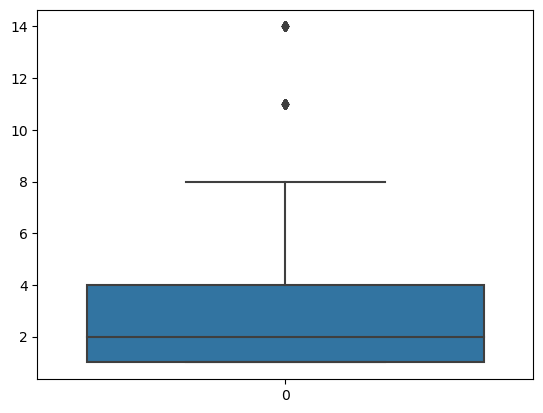

In [63]:
sns.boxplot(data=players_df['position.id'])
 # Show the plot.
plt.show()

In [64]:
#We can clearly see the outliers are position 6
#Removing outliers above 160 runs
players_df['position.id']=players_df['position.id'].apply(lambda x: x if x < 6 else np.nan)

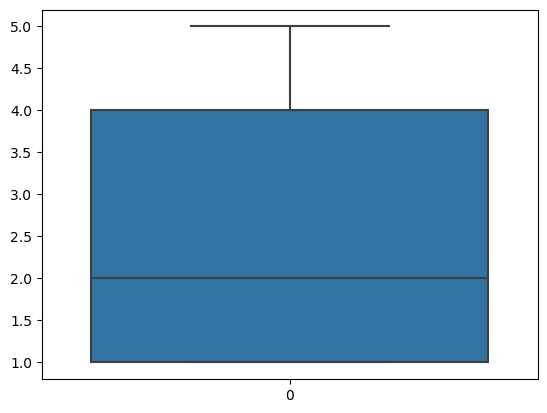

In [65]:
sns.boxplot(data=players_df['position.id'])
 # Show the plot.
plt.show()

#### Find duplicates

In [66]:
#In general find if there are any duplicate records

print(f"There are {players_df['fullname'].duplicated().sum()} duplicate records in the Match_results_df.")



There are 737 duplicate records in the Match_results_df.


In [67]:
#Removing the duplicates
test_df=players_df['fullname'].drop_duplicates()
test_df
# printing results afater removing duplicates
print(f"There are {test_df.duplicated().sum()} duplicate records in the Match_results_df.")

There are 0 duplicate records in the Match_results_df.


#### Combining two dataframes

In [68]:
#combining the dataframes based on player id
#players_df['id'] = fixtures_df['man_of_match_id']
#Create a new columns
players_df['man_of_match_id'] = players_df['id']

In [69]:
# combining two data sets based on Winner and Mat
Combined_df=pd.merge(fixtures_df, players_df,how='left',on='man_of_match_id')
Combined_df.columns
#the Combined table now has name of the played based on player ID

Index(['resource_x', 'id_x', 'league_id', 'season_id', 'stage_id', 'round',
       'localteam_id', 'visitorteam_id', 'starting_at', 'type', 'live',
       'status', 'last_period', 'note', 'venue_id', 'toss_won_team_id',
       'winner_team_id', 'draw_noresult', 'first_umpire_id',
       'second_umpire_id', 'tv_umpire_id', 'referee_id', 'man_of_match_id',
       'man_of_series_id', 'total_overs_played', 'elected', 'super_over',
       'follow_on', 'rpc_overs', 'rpc_target', 'weather_report',
       'localteam_dl_data.score', 'localteam_dl_data.overs',
       'localteam_dl_data.wickets_out', 'visitorteam_dl_data.score',
       'visitorteam_dl_data.overs', 'visitorteam_dl_data.wickets_out',
       'visitorteam_dl_data.total_overs_played', 'localteam_dl_data.rpc_overs',
       'localteam_dl_data.rpc_targets', 'resource_y', 'id_y', 'country_id',
       'firstname', 'lastname', 'fullname', 'image_path', 'dateofbirth',
       'gender', 'battingstyle', 'bowlingstyle', 'updated_at',
       'pos

In [70]:
print(f"The size of fixtures_df is {fixtures_df.shape}.")
print(f"The size of players_df is {players_df.shape}.")
print(f"The size of Combined_df is {Combined_df.shape}.")

The size of fixtures_df is (100, 40).
The size of players_df is (17566, 16).
The size of Combined_df is (100, 55).


### Ethical Implementation

The data represents the player details such as th ecountry associated with, matches played, lost the overall performance on each match etc.
I see below ethical impications
1. This could impact the selection process of players as it will be purelye based on perfoamce. some played may do good with specific teams and may get chosen for the same opponent.
2. The underground betting market may use this information to bet on the specific teams and/or players only.
3. Players may develop skill sin specific areas only 

# Milestone 5 <a class="anchor" id="Milestone_5"></a>

#### Listing three databases

In [71]:
#The three data sets to be used are

#1. Excel reads
cricket_data_df.head()

,Unnamed: 0,ID,NAME,COUNTRY,Full name,Birthdate,Birthplace,Died,Date_of_death,Age,...,BOWLING_T20s_Runs,BOWLING_T20s_Wkts,BOWLING_T20s_BBI,BOWLING_T20s_BBM,BOWLING_T20s_Ave,BOWLING_T20s_Econ,BOWLING_T20s_SR,BOWLING_T20s_4w,BOWLING_T20s_5w,BOWLING_T20s_10
0,0,8772,Henry Arkell,England,Henry John Denham Arkell,1898-06-26,"Edmonton, Middlesex",Dead,12/03/82,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,532565,Richard Nyren,England,Richard Nyren,1734-04-25,"Eartham, Sussex",Dead,1797-04-25,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,16856,Sydney Maartensz,England,Sydney Gratien Adair Maartensz,1882-04-14,"Colombo, Ceylon",Dead,10/09/67,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,16715,Brian Lander,England,Brian Richard Lander,09/01/42,"Bishop Auckland, Co Durham",Alive,NaN,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15989,Derek Kenderdine,England,Derek Charles Kenderdine,1897-10-28,"Chislehurst, Kent",Dead,28/08/47,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#2. data set from online website
Captian_df.head()

,Player,Span,Mat,Won,Lost,Tied,Draw,NR,W/L,%W,%L,% Tied,% Draw,%NR,%
0,RT Ponting (AUS/ICC),2002-2012,230,165,51,2,0,12,3.23,71.73,22.17,0.86,0.0,5.21,76.14
1,SP Fleming (NZ),1997-2007,218,98,106,1,0,13,0.92,44.95,48.62,0.45,0.0,5.96,48.04
2,MS Dhoni (IND),2007-2018,200,110,74,5,0,11,1.48,55.00,37.00,2.50,0.0,5.50,59.52
3,A Ranatunga (SL),1988-1999,193,89,95,1,0,8,0.93,46.11,49.22,0.51,0.0,4.14,48.37
4,AR Border (AUS),1985-1994,178,107,67,1,0,3,1.59,60.11,37.64,0.56,0.0,1.68,61.42


In [73]:
#3. data set from webapi
players_batsman.head()

,resource,id,country_id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,updated_at,position.resource,position.id,position.name
0,players,2,52126,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,1991-11-23,m,right-hand-bat,legbreak,2020-03-31T05:00:31.000000Z,positions,1,Batsman
3,players,5,52126,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,1985-02-19,m,right-hand-bat,legbreak,2020-04-01T02:28:23.000000Z,positions,1,Batsman
4,players,6,52126,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,1990-04-10,m,left-hand-bat,slow-left-arm-orthodox,2020-04-02T02:22:22.000000Z,positions,1,Batsman
5,players,7,52126,Imam,ul Haq,Imam ul Haq,https://cdn.sportmonks.com/images/cricket/play...,1995-12-12,m,left-hand-bat,None,2020-04-02T09:00:48.000000Z,positions,1,Batsman
6,players,8,52126,Babar,Azam,Babar Azam,https://cdn.sportmonks.com/images/cricket/play...,1994-10-15,m,right-hand-bat,right-arm-offbreak,2020-02-23T10:47:44.000000Z,positions,1,Batsman


#### Creat SQL Database and store all three dataframes

In [74]:
# Create a connection to the SQLite database
conn = sqlite3.connect('ProjectDatabase.db')


In [75]:
# Create a cursor object
cursor = conn.cursor()

In [76]:
# Store the first DataFrame in the database
cricket_data_df.to_sql('Excel-Cricket-data', conn, if_exists='replace', index=False)

90308

In [77]:
# Store the second DataFrame in the database
Captian_df.to_sql('http-Captian-data', conn, if_exists='replace', index=False)

100

In [78]:
# Store the third DataFrame in the database
players_batsman.to_sql('Webapi-batsman-data', conn, if_exists='replace', index=False)

4966

In [79]:
# Close the connection to the database
conn.close()

#### Combining the three datasets together

In [80]:
Captian_df['LastName'] =Captian_df['Player'].str.split(' ').str[-2]


In [81]:
Captian_df['LastName']

0       Ponting
1       Fleming
2         Dhoni
3     Ranatunga
4        Border
        ...    
95      Shahidi
96     Johnston
97      Romaine
98          Ali
99       Borren
Name: LastName, Length: 100, dtype: object

In [82]:
cricket_data_df['LastName'] =cricket_data_df['NAME'].str.split(' ').str[-1]

In [83]:
cricket_data_df['LastName'] 

0              Arkell
1               Nyren
2           Maartensz
3              Lander
4          Kenderdine
             ...     
90303        Robinson
90304    Hine-Haycock
90305          Hughes
90306         Clayton
90307         Clewitt
Name: LastName, Length: 90308, dtype: object

In [84]:
Combined_project_df = cricket_data_df.merge(Captian_df,how='left',on='LastName')

In [85]:
print(f"The size of Captian_df is {Captian_df.shape}.")
print(f"The size of cricket_data_df is {cricket_data_df.shape}.")
print(f"The size of Combined_project_df is {Combined_project_df.shape}.")

The size of Captian_df is (100, 16).
The size of cricket_data_df is (90308, 178).
The size of Combined_project_df is (92382, 193).


In [86]:

#Creating a new column based on last name
players_batsman['LastName']=players_batsman['lastname']

In [87]:
Combined_project_df = Combined_project_df.merge(players_batsman,how='inner',on='LastName')

In [88]:
print(f"The size of players_batsman is {players_batsman.shape}.")
print(f"The size of Combined_project_df is {Combined_project_df.shape}.")

The size of players_batsman is (4966, 16).
The size of Combined_project_df is (697397, 208).


#### Store the combined table in SQLite

In [89]:
# Create a connection to the SQLite database
conn = sqlite3.connect('ProjectDatabase.db')

In [90]:
# Create a cursor object
cursor = conn.cursor()

In [91]:
Combined_project_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
Combined_project_df.rename(columns={'id': 'project_id'}, inplace=True)
Combined_project_df.rename(columns={'lastname': 'lastname_'}, inplace=True)

In [93]:
Combined_project_df.to_sql('Combined_project_df-data', conn, if_exists='replace', index=False)

697397

In [94]:
# Close the connection to the database
conn.close()

In [95]:
Combined_project_df.describe()

,Unnamed: 0,ID,Age,BATTING_Tests_Mat,BATTING_Tests_Inns,BATTING_Tests_NO,BATTING_Tests_Runs,BATTING_Tests_Ave,BATTING_Tests_BF,BATTING_Tests_SR,...,W/L,%W,%L,% Tied,% Draw,%NR,%,project_id,country_id,position.id
count,697397.000000,6.973970e+05,439062.000000,19426.000000,19136.000000,19136.000000,19136.000000,18279.000000,11804.000000,11804.000000,...,413133.000000,413133.000000,413133.000000,413133.000000,413133.0,413133.000000,413133.000000,697397.000000,6.973970e+05,697397.0
mean,32593.910890,4.248556e+05,38.452660,16.006435,25.444293,3.419367,664.055132,18.646708,1317.418841,46.254821,...,1.314261,54.560338,43.139894,0.290011,0.0,1.992545,55.787683,26815.851020,3.155742e+05,1.0
std,18071.140143,4.307063e+05,16.647608,26.338697,42.481751,5.986866,1586.658648,13.732213,3444.202302,22.633463,...,0.408680,6.855216,6.377285,0.510149,0.0,1.601648,6.706736,14809.126926,2.490111e+06,0.0
min,7.000000,3.933000e+03,-34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.230000,18.030000,20.450000,0.000000,0.0,0.000000,19.290000,2.000000,2.000000e+00,1.0
25%,16318.000000,3.924000e+04,26.000000,2.000000,2.000000,0.000000,21.000000,7.250000,44.000000,31.250000,...,1.270000,53.950000,41.170000,0.000000,0.0,0.000000,55.920000,15198.000000,1.160000e+02,1.0
50%,34815.000000,3.006310e+05,35.000000,4.000000,7.000000,1.000000,69.000000,15.330000,168.000000,44.670000,...,1.270000,53.950000,42.440000,0.000000,0.0,2.870000,55.920000,25236.000000,6.740000e+02,1.0
75%,43219.000000,8.782270e+05,46.000000,14.000000,24.000000,3.000000,342.000000,28.130000,686.000000,57.970000,...,1.420000,58.820000,42.440000,0.710000,0.0,2.870000,58.820000,40115.000000,5.212600e+04,1.0
max,90306.000000,1.178645e+06,185.000000,200.000000,329.000000,86.000000,15921.000000,144.000000,31258.000000,129.620000,...,3.770000,77.270000,79.680000,5.880000,0.0,10.810000,79.060000,52430.000000,2.415087e+07,1.0


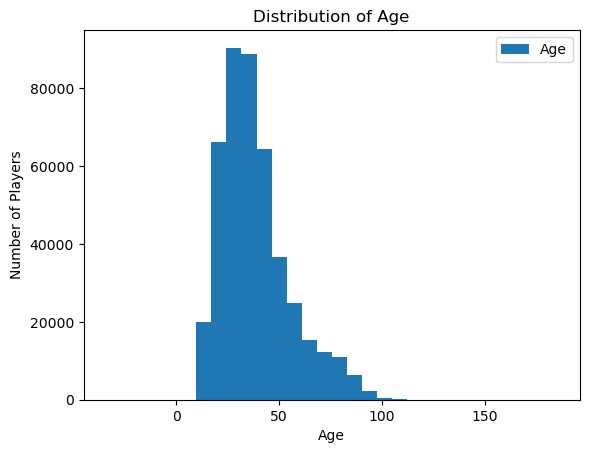

In [104]:
from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
#Plot the hisory of the age disctribution
hist(Combined_project_df['Age'], bins = 30)
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Age')

# Add legend
labels = ['Age', 'Players']
plt.legend(labels)

# Show the plot
plt.show()

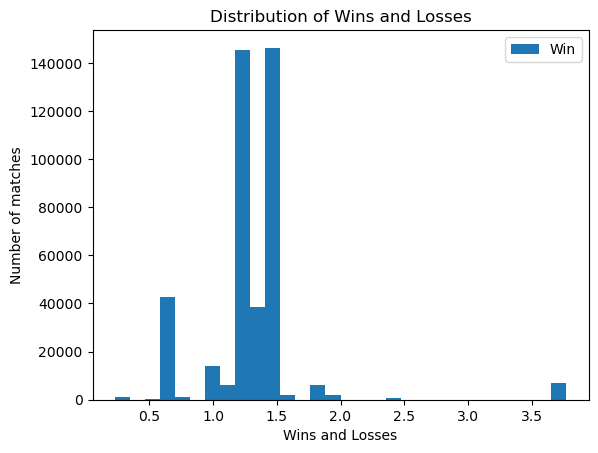

In [105]:

hist(Combined_project_df['W/L'], bins = 30)
# Add labels and title
plt.xlabel('Wins and Losses')
plt.ylabel('Number of matches')
plt.title('Distribution of Wins and Losses')

# Add legend
labels = ['Win', 'Matches']
plt.legend(labels)

# Show the plot
plt.show()

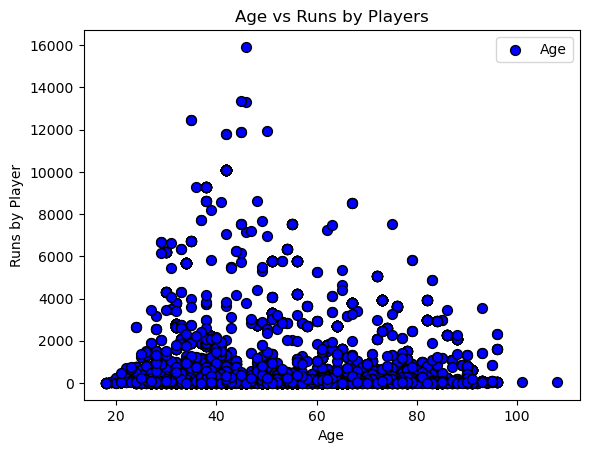

In [109]:
#scatter plots

plt.scatter(Combined_project_df['Age'], Combined_project_df['BATTING_Tests_Runs'], color='blue', edgecolors='black', s=50)

plt.xlabel('Age')
plt.ylabel('Runs by Player')
plt.title('Age vs Runs by Players')

# Add legend
labels = ['Age', 'Player Runs ']
plt.legend(labels)

# Show the plot
plt.show()

In [111]:
plt.scatter(Combined_project_df['BATTING_Tests_Inns'], Combined_project_df['BATTING_Tests_Runs'], color='blue', edgecolors='black', s=50)

plt.xlabel('Innings')
plt.ylabel('Innings by Runs')
plt.title('Innings vs Runs by Players')

# Add legend
labels = ['Innings', 'Player Runs ']
plt.legend(labels)

# Show the plot
plt.show()

#### Learning on the project

1. The data can be available at multiple sources e.g. wexcel, odbc, access, html or a webapi
2. The data sceintiest shuold know how to pull the data from fifferent sources
3. The data sources should generally have some common key e.g. primary key and need to establish foreign key relationships
4. There are multiple databaes available in the market e.g. Oracle, MySQL, MongoDB, SQLite and other cloud based data sources .e.g. cosmos database
5. The cleaning, merging and processing of the data are the major activities and should be performed to ensure that the data sources are reliable.

#### Ethical Implementation
The combined data represents the number of matches won by the countries, the payer details and statistics 
1. The clubs may encourage only specific teams based on the past records.
2. The underground betting market may use this information to bet on the specific teams and/or players only.
3. Only specfic players may get a chance to play multiple matches or the selection will be based on the playesr who did best againt specific 
teams 
4. The selection process will be purelye based on perfoamce. Some played may do good with specific teams and 
may get chosen for the same opponent.
5. Players may develop skills in specific areas only 
